In [1]:
import random
import os
import matplotlib.pylab as plt
from glob import glob
import numpy as np
import webcolors
%matplotlib inline

In [2]:
PATH = os.path.abspath('data')

SOURCE_IMAGES = os.path.join(PATH, "images/resized/*")

images = glob(os.path.join(SOURCE_IMAGES, "*.jpg"))

SOURCE_LABELS = os.path.join(PATH, "labels/resized/*")

labels = glob(os.path.join(SOURCE_LABELS, "*.png"))

In [3]:
images.sort()
labels.sort()
print(np.size(images))
print(np.size(labels))

143
143


In [4]:
x = [] # images
y = [] # labels

for img in images:
    full_size_image = plt.imread(img)
    x.append(full_size_image)

for lbl in labels:
    full_size_label = plt.imread(lbl,0)
    y.append(full_size_label)
    
x = np.asarray(x)
y = np.asarray(y)

cs = ['background','asphalt', 'building', 'forest', 'grass', 'ground', 'roadAsphalt', 'roadGround', 'water']


print(y.min())
print(y.max())

print(x.shape)
print(y.shape)

h, w = x.shape[1:3]

x = x[:,:,(w-h)//2:(w-(w-h)//2),:]
y = y[:,:,(w-h)//2:(w-(w-h)//2)]

print(x.shape)
print(y.shape)

0
8
(143, 512, 640, 3)
(143, 512, 640)
(143, 512, 512, 3)
(143, 512, 512)


In [5]:
def colorize(mask):
    hex_colors = ['#000000','#4A4A4A','#FF0000', '#407700', '#00FF37', '#8B572A', '#0000FF', '#FF7600', '#50E3C2']

    rgb_colors = []

    for hex_color in hex_colors:
        rgb_colors.append(webcolors.hex_to_rgb(hex_color))
        
    colors = np.array(rgb_colors)
        
    colorMask = np.zeros([mask.shape[0], mask.shape[1], 3],dtype=np.uint8)
    for r in range(mask.shape[0]):
        for c in range(mask.shape[1]):
            colorMask[r,c,] = colors[mask[r,c]]

    return colorMask

In [6]:
image = x[-1].copy()
mask = y[-1].copy()
print(image.shape, mask.shape)

(512, 512, 3) (512, 512)


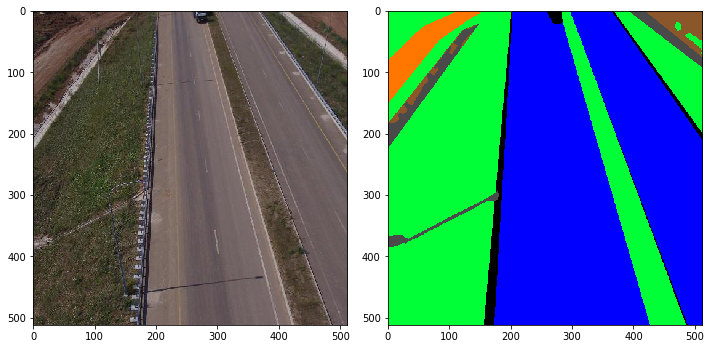

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
axes[0].imshow(image)
axes[1].imshow(colorize(mask))
fig.tight_layout()

In [9]:
from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    CenterCrop,    
    Crop,
    Compose,
    Transpose,
    RandomRotate90,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    OneOf,
    CLAHE,
    RandomContrast,
    RandomGamma,
    Rotate,
    ShiftScaleRotate,
    RandomBrightness
)

In [10]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(10, 10))

        ax[0].imshow(image)
        ax[1].imshow(colorize(mask))
    else:
        f, ax = plt.subplots(2, 2, figsize=(10, 10))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(colorize(original_mask))
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(colorize(mask))
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

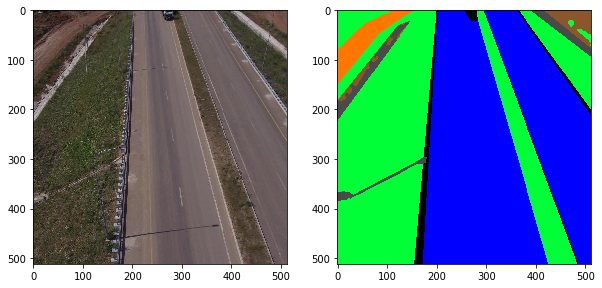

In [11]:
original_height, original_width = image.shape[:2]
visualize(image, mask)

# Non destructive transformations

## Horizontal Flip

[0 1 4 5 6 7]
[0 1 4 5 6 7]


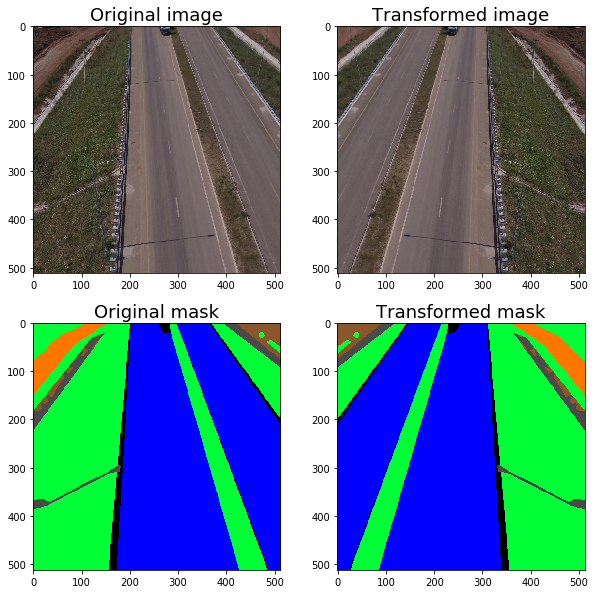

In [42]:
aug = HorizontalFlip(p=1)
# aug = ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=20, p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

print(np.unique(mask))
print(np.unique(mask_h_flipped))

## Vertical Flip

[0 1 4 5 6 7]
[0 1 4 5 6 7]


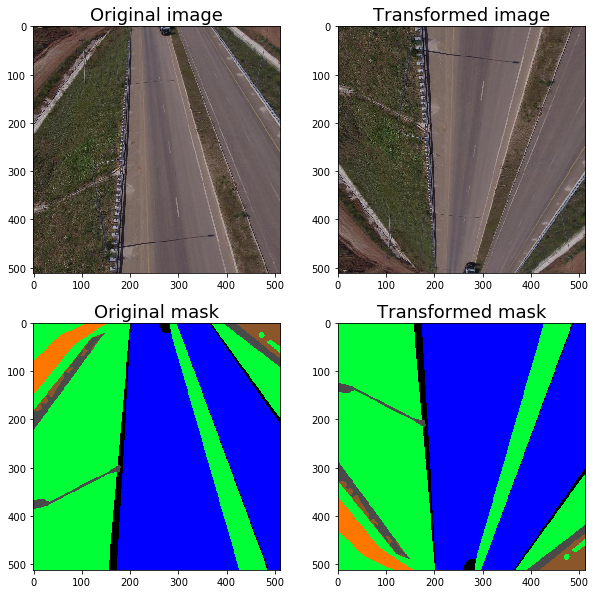

In [12]:
aug = VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visualize(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

print(np.unique(mask))
print(np.unique(mask_v_flipped))

## RandomRotate90 

[0 1 4 5 6 7]
[0 1 4 5 6 7]


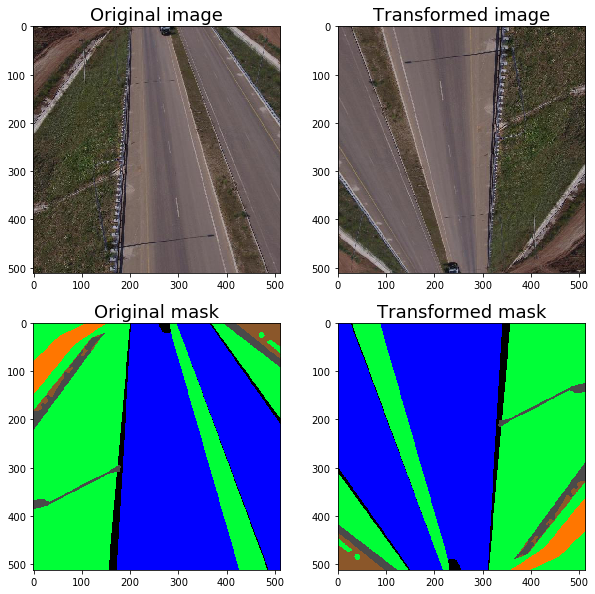

In [13]:
aug = RandomRotate90(p=1.0)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

visualize(image_rot90, mask_rot90, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_rot90))

## Transpose

[0 1 4 5 6 7]
[0 1 4 5 6 7]


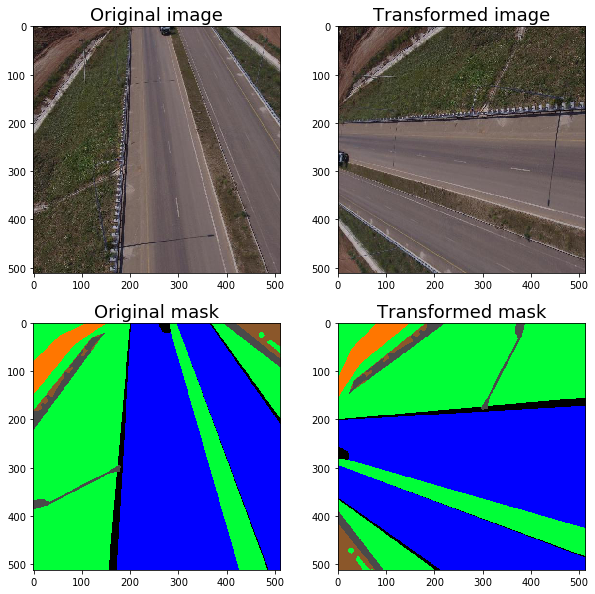

In [14]:
aug = Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize(image_transposed, mask_transposed, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_transposed))

# Non-rigid transformations

## ElasticTransform

[0 1 4 5 6 7]
[0 1 4 5 6 7]


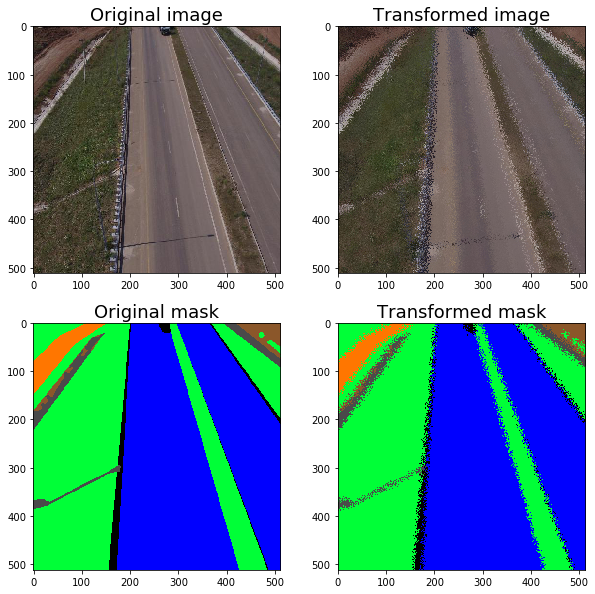

In [15]:
al = 10
aug = ElasticTransform(p=1, alpha=al, sigma=al * 0.05, alpha_affine=al * 0.03)

augmented = aug(image=image, mask=mask)

image_elastic = augmented['image']
mask_elastic = augmented['mask']

visualize(image_elastic, mask_elastic, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_elastic))

## GridDistortion

[0 1 4 5 6 7]
[0 1 4 5 6 7]


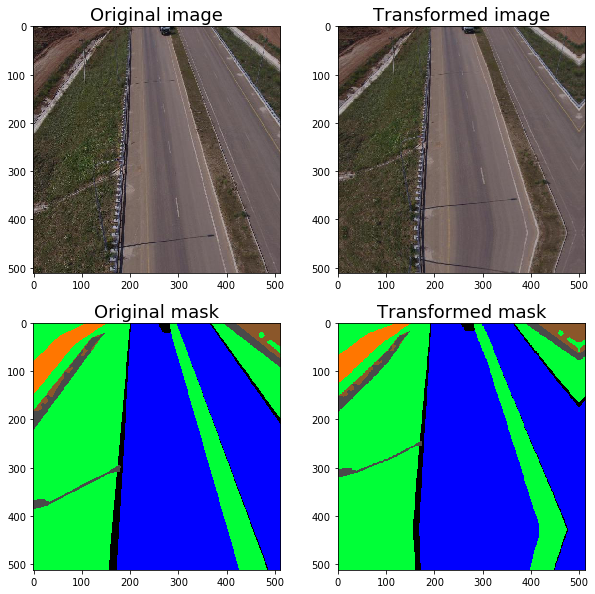

In [16]:
aug = GridDistortion(p=1)

augmented = aug(image=image, mask=mask)

image_grid = augmented['image']
mask_grid = augmented['mask']

visualize(image_grid, mask_grid, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_grid))

## OpticalDistortion

[0 1 4 5 6 7]
[0 1 4 5 6 7]


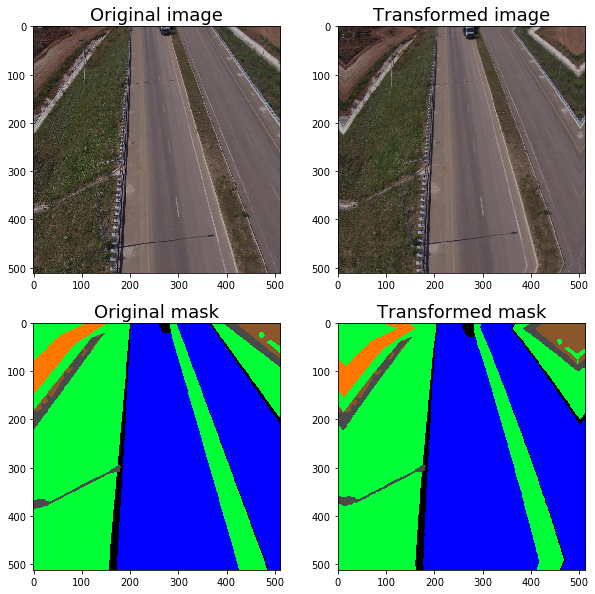

In [69]:
aug = OpticalDistortion(p=1, distort_limit=0.25, shift_limit=0.5)

augmented = aug(image=image, mask=mask)

image_optical = augmented['image']
mask_optical = augmented['mask']

visualize(image_optical, mask_optical, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_optical))

## RandomSizedCrop

[0 1 4 5 6 7]
[0 1 4 5 6 7]


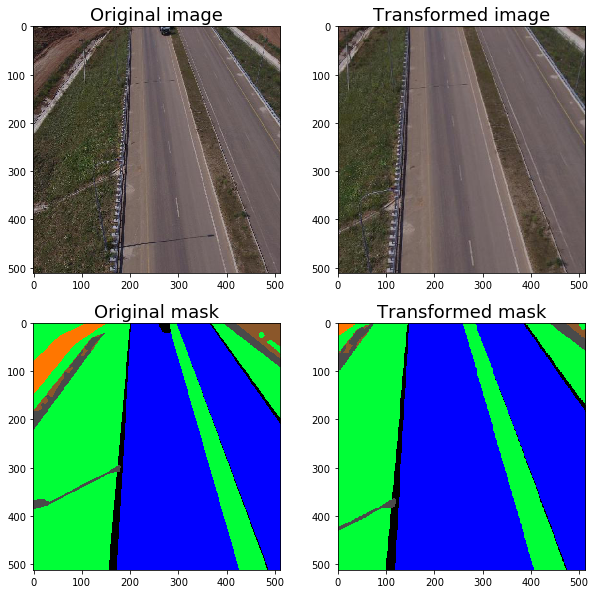

In [17]:
aug = RandomSizedCrop(p=1, min_max_height=(256, 512), height=original_height, width=original_width)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled = augmented['mask']

visualize(image_scaled, mask_scaled, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_scaled))

# Non-spatial stransformations

## CLAHE

[0 1 4 5 6 7]
[0 1 4 5 6 7]


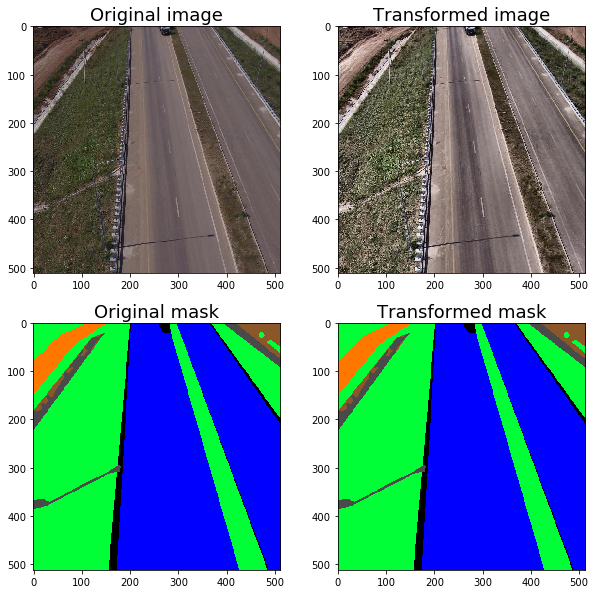

In [18]:
aug = CLAHE(p=1, clip_limit=4.)

augmented = aug(image=image, mask=mask)

image_clahe = augmented['image']
mask_clahe = augmented['mask']

visualize(image_clahe, mask_clahe, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_clahe))

## RandomContrast

[0 1 4 5 6 7]
[0 1 4 5 6 7]


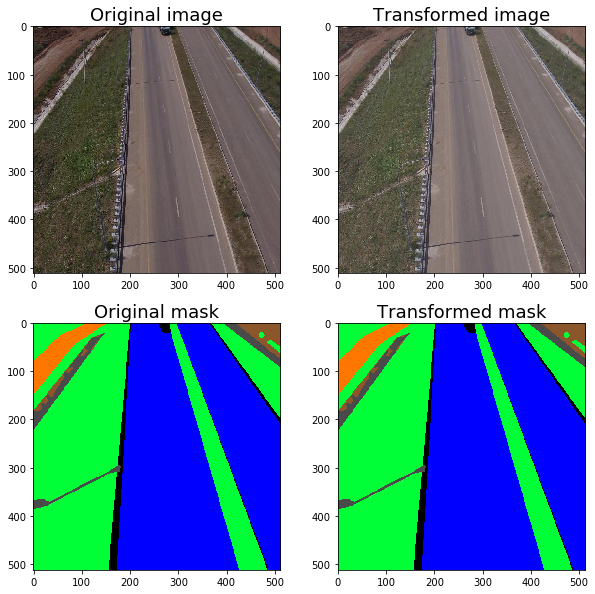

In [93]:
aug = RandomContrast(p=1., limit=0.25)

augmented = aug(image=image, mask=mask)

image_contrast = augmented['image']
mask_contrast = augmented['mask']

visualize(image_contrast, mask_contrast, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_contrast))

## RandomBrightness

[0 1 4 5 6 7]
[0 1 4 5 6 7]


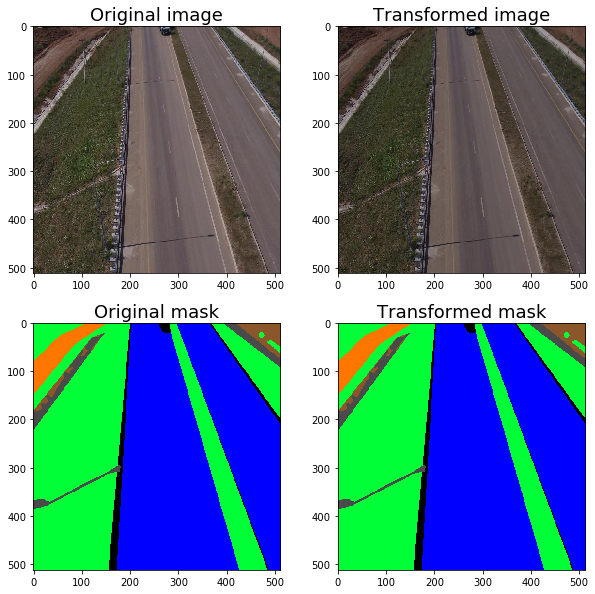

In [99]:
aug = RandomBrightness(p=1., limit=0.25)

augmented = aug(image=image, mask=mask)

image_brightness = augmented['image']
mask_brightness = augmented['mask']

visualize(image_brightness, mask_brightness, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_brightness))

## RandomGamma

[0 1 4 5 6 7]
[0 1 4 5 6 7]


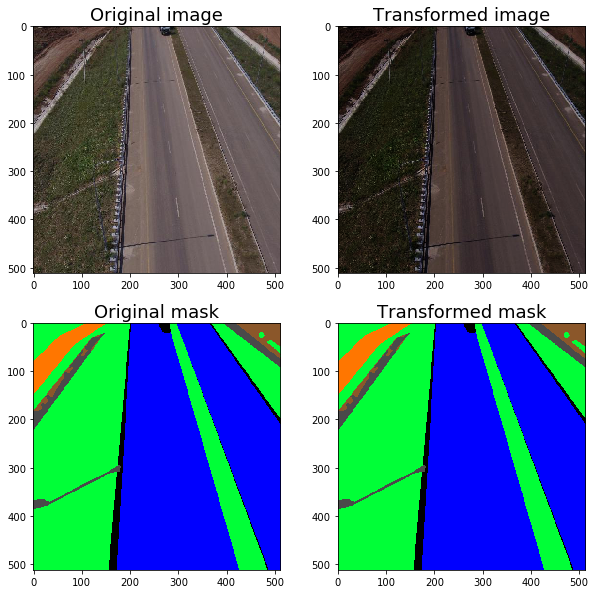

In [103]:
aug = RandomGamma(p=1., gamma_limit=(50,200))

augmented = aug(image=image, mask=mask)

image_gamma = augmented['image']
mask_gamma = augmented['mask']

visualize(image_gamma, mask_gamma, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_gamma))

# Combination

In [ ]:
aug = Compose([
    OneOf([RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.5),
          PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)], p=1),    
    VerticalFlip(p=0.5),              
    RandomRotate90(p=0.5),
    OneOf([
        ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        GridDistortion(p=0.5),
        OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)                  
        ], p=0.8),
    CLAHE(p=0.8),
    RandomContrast(p=0.8),
    RandomBrightness(p=0.8),
    RandomGamma(p=0.8)])

augmented = aug(image=image, mask=mask)

image_heavy = augmented['image']
mask_heavy = augmented['mask']

visualize(image_heavy, mask_heavy, original_image=image, original_mask=mask)
print(np.unique(mask))
print(np.unique(mask_heavy))

In [106]:
from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(contrast_stretching=True, adaptive_equalization=True, histogram_equalization=True)
datagen = ImageDataGenerator(contrast_stretching=True)

# fit parameters from data
datagen.fit(x)

# Configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x, y, batch_size=9):
    # Show the first 9 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(img_rows, img_cols, 3))
    # show the plot
    pyplot.show()
    break

TypeError: __init__() got an unexpected keyword argument 'contrast_stretching'